<a href="https://colab.research.google.com/github/njafarov/Optimization_NLP/blob/main/Callenge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyomo
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 26.5 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 


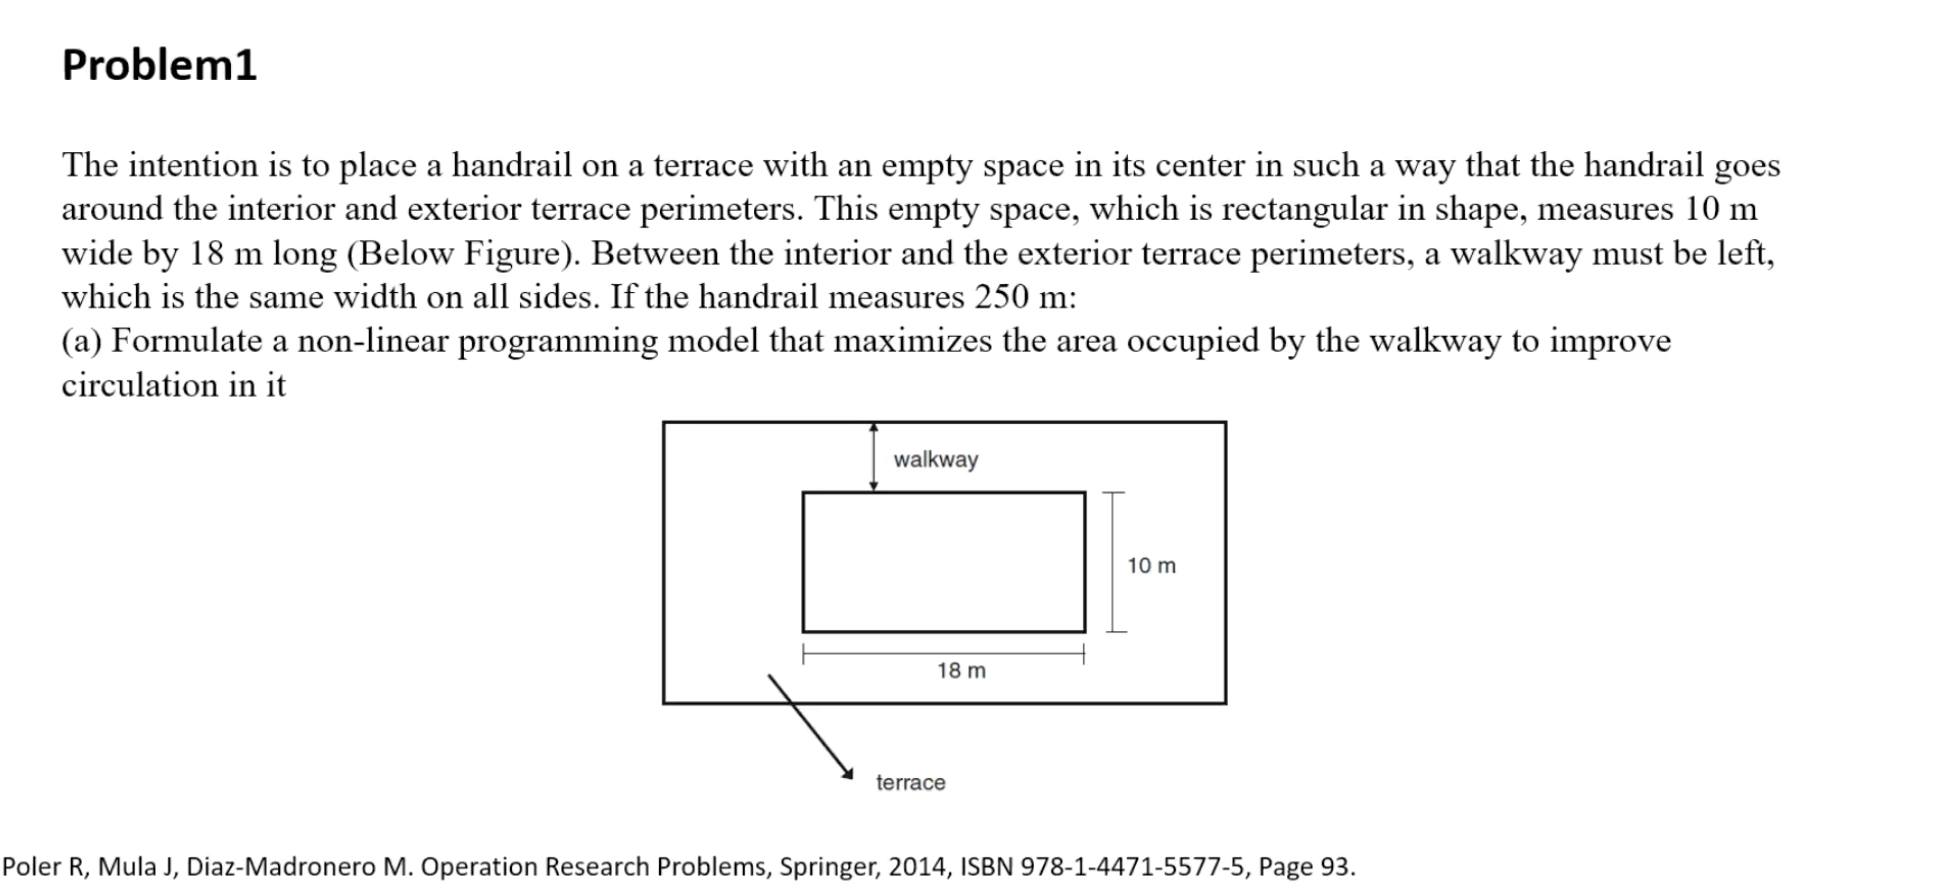

In [ ]:
# Define model
model = pyo.ConcreteModel()

# Define variables:
model.x1 = pyo.Var(domain=pyo.NonNegativeReals)
x1 = model.x1
model.x2 = pyo.Var(domain=pyo.NonNegativeReals)
x2 = model.x2


# Optimization formula
def objection_function(model):
  return x1*x2-180
model.Obj = pyo.Objective(rule=objection_function, sense=pyo.maximize)

# Constrains
def cons1(model):
  return 0.5*x1-0.5*x2==-4
model.Cons1 = pyo.Constraint(rule=cons1)

def cons2(model):
  return 2*x1+2*x2<=194
model.Cons2 = pyo.Constraint(rule=cons2)


# Optimization

Solver = SolverFactory('ipopt',executable = '/content/ipopt')
results = Solver.solve(model)

print(results)
print("Objective Function: ", model.Obj())
print("X1: ", x1())
print("X2: ", x2())









Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 2
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.029250383377075195
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective Function:  2156.2500470424943
X1:  44.500000484974166
X2:  52.500000484974166
